# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [61]:
# Dependencies and Setup
from random import uniform
from citipy import citipy
from urllib.parse import quote
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import os

# Import API key
api_key = os.environ.get('OPENWEATHERMAP_KEY')

## Generate Cities List

In [5]:
# Create a variable to hold upper range limit
upper_range = 1500

# Set up lists to hold city info
city = []
country = []

# Create a random set of latitude and longitude coordinates
coords = [(uniform(-90,90),uniform(-180,180)) for i in range(0,upper_range)]

In [62]:
# For loop to find the nearest city to the random coordinates and add the city name and country to the lists
for x in range(0,upper_range):
    close_city = citipy.nearest_city(coords[x][0],coords[x][1])
    city.append(close_city.city_name)
    country.append(close_city.country_code)

In [79]:
# Create a dataframe from the city and country lists
city_df = pd.DataFrame({'City': city, 'Country':country})

In [80]:
# Drop any duplicates from the dataframe and reset the index
city_clean_df = city_df.drop_duplicates().reset_index(drop=True)


In [81]:
# Fix the capitalization of the cities and country abbreviations
city_clean_df['City'] = city_clean_df['City'].str.title()
city_clean_df['Country'] = city_clean_df['Country'].str.upper()
city_clean_df

,City,Country
0,Hermanus,ZA
1,Kruisfontein,ZA
2,Butaritari,KI
3,Kodiak,US
4,Hobart,AU
...,...,...
622,Tabory,RU
623,Port-Gentil,GA
624,Petropavlovsk-Kamchatskiy,RU
625,Kalomo,ZM


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [82]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build partial query URL
query_url = f"{url}appid={api_key}&q="

# Add columns for Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, and Date
city_clean_df['Lat'] = ""
city_clean_df['Lng'] = ""
city_clean_df['Max Temp'] = ""
city_clean_df['Humidity'] = ""
city_clean_df['Cloudiness'] = ""
city_clean_df['Wind Speed'] = ""
city_clean_df['Date'] = ""

In [83]:
# Determine the number of rows to display in the progress message
index_max = city_clean_df.index.size

# Create a for loop to iterate through the dataframe and collect the necessary data
for index, row in city_clean_df.iterrows():

    # Create the processing message
    print(f"Processing city {index} of {index_max} | {row['City']}, {row['Country']}")
    
    # Try to grab the weather data from the openweathermap api
    try:
        response = requests.get(query_url + row['City'] + ',' + row['Country'] + '&units=imperial').json()
        city_clean_df.loc[index, "Lat"] = response['coord']['lat']
        city_clean_df.loc[index, "Lng"] = response['coord']['lon']
        city_clean_df.loc[index, "Max Temp"] = response['main']['temp_max']
        city_clean_df.loc[index, "Humidity"] = response['main']['humidity']
        city_clean_df.loc[index, "Cloudiness"] = response['clouds']['all']
        city_clean_df.loc[index, "Wind Speed"] = response['wind']['speed']
        city_clean_df.loc[index, "Date"] = response['dt']
    
    # Handle exceptions for a city not found
    except:
        print("City not found. Skipping...")

Processing city 0 of 627 | Hermanus, ZA
Processing city 1 of 627 | Kruisfontein, ZA
Processing city 2 of 627 | Butaritari, KI
Processing city 3 of 627 | Kodiak, US
Processing city 4 of 627 | Hobart, AU
Processing city 5 of 627 | Punta Arenas, CL
Processing city 6 of 627 | Port Alfred, ZA
Processing city 7 of 627 | Rikitea, PF
Processing city 8 of 627 | Bageshwar, IN
Processing city 9 of 627 | Saint-Philippe, RE
Processing city 10 of 627 | Hilo, US
Processing city 11 of 627 | Ushuaia, AR
Processing city 12 of 627 | Yellowknife, CA
Processing city 13 of 627 | Los Llanos De Aridane, ES
Processing city 14 of 627 | Kirakira, SB
Processing city 15 of 627 | Komsomolskiy, RU
Processing city 16 of 627 | Coquimbo, CL
Processing city 17 of 627 | Taolanaro, MG
City not found. Skipping...
Processing city 18 of 627 | Cabo San Lucas, MX
Processing city 19 of 627 | Mataura, PF
City not found. Skipping...
Processing city 20 of 627 | Tessalit, ML
Processing city 21 of 627 | Naze, JP
Processing city 22 o

Processing city 181 of 627 | Mount Isa, AU
Processing city 182 of 627 | Vaini, TO
Processing city 183 of 627 | Luganville, VU
Processing city 184 of 627 | Conde, BR
Processing city 185 of 627 | Hamptons At Boca Raton, US
Processing city 186 of 627 | Camocim, BR
Processing city 187 of 627 | Georgetown, SH
Processing city 188 of 627 | Klaksvik, FO
Processing city 189 of 627 | Bongandanga, CD
Processing city 190 of 627 | Charlestown, KN
Processing city 191 of 627 | Evensk, RU
Processing city 192 of 627 | Kalmunai, LK
Processing city 193 of 627 | Lengshuijiang, CN
Processing city 194 of 627 | Sorland, NO
Processing city 195 of 627 | Sinnamary, GF
Processing city 196 of 627 | Taoudenni, ML
Processing city 197 of 627 | Ostrovnoy, RU
Processing city 198 of 627 | Touros, BR
Processing city 199 of 627 | Ardahan, TR
Processing city 200 of 627 | Balkanabat, TM
Processing city 201 of 627 | Gravdal, NO
Processing city 202 of 627 | Hasaki, JP
Processing city 203 of 627 | Soyo, AO
Processing city 204

Processing city 365 of 627 | Bonthe, SL
Processing city 366 of 627 | Alice Springs, AU
Processing city 367 of 627 | Novyy Oskol, RU
Processing city 368 of 627 | Flin Flon, CA
Processing city 369 of 627 | Roald, NO
Processing city 370 of 627 | Belyy Yar, RU
Processing city 371 of 627 | San Quintin, MX
Processing city 372 of 627 | Raudeberg, NO
Processing city 373 of 627 | Saint-Prosper, CA
Processing city 374 of 627 | Najran, SA
Processing city 375 of 627 | Ocean City, US
Processing city 376 of 627 | Emba, KZ
Processing city 377 of 627 | Marquette, US
Processing city 378 of 627 | Ulaangom, MN
Processing city 379 of 627 | Molo, KE
Processing city 380 of 627 | Flinders, AU
Processing city 381 of 627 | Sitka, US
Processing city 382 of 627 | Vestmannaeyjar, IS
Processing city 383 of 627 | Durango, MX
Processing city 384 of 627 | Bethel, US
Processing city 385 of 627 | Mikun, RU
Processing city 386 of 627 | Kuito, AO
Processing city 387 of 627 | Faanui, PF
Processing city 388 of 627 | Kijang

Processing city 550 of 627 | Leh, IN
Processing city 551 of 627 | Farmington, US
Processing city 552 of 627 | Urumqi, CN
Processing city 553 of 627 | Yuksekova, TR
Processing city 554 of 627 | Bastogne, BE
Processing city 555 of 627 | Vila Velha, BR
Processing city 556 of 627 | Kropotkin, RU
Processing city 557 of 627 | Nador, MA
Processing city 558 of 627 | Fernie, CA
Processing city 559 of 627 | Chinsali, ZM
Processing city 560 of 627 | Albion, MU
Processing city 561 of 627 | Namatanai, PG
Processing city 562 of 627 | Namasuba, UG
Processing city 563 of 627 | Nara, ML
Processing city 564 of 627 | Qunduz, AF
Processing city 565 of 627 | Papetoai, PF
Processing city 566 of 627 | Sistranda, NO
Processing city 567 of 627 | Tianpeng, CN
Processing city 568 of 627 | Lasa, CN
City not found. Skipping...
Processing city 569 of 627 | Giporlos, PH
Processing city 570 of 627 | Hohhot, CN
Processing city 571 of 627 | Saryshagan, KZ
City not found. Skipping...
Processing city 572 of 627 | Broome,

In [84]:
# Remove the rows where the city wasn't found
city_clean_df = city_clean_df[~(city_clean_df["Lat"] == "")]
city_clean_df.reset_index(drop=True, inplace=True)

In [85]:
# Set the data type as float for the Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, and Date columns
city_clean_df["Lat"] = city_clean_df["Lat"].astype(float)
city_clean_df["Lng"] = city_clean_df["Lng"].astype(float)
city_clean_df["Max Temp"] = city_clean_df["Max Temp"].astype(float)
city_clean_df["Humidity"] = city_clean_df["Humidity"].astype(float)
city_clean_df["Cloudiness"] = city_clean_df["Cloudiness"].astype(float)
city_clean_df["Wind Speed"] = city_clean_df["Wind Speed"].astype(float)
city_clean_df["Date"] = city_clean_df["Date"].astype(float)

<ipython-input-85-7c3705e44374>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_clean_df["Lat"] = city_clean_df["Lat"].astype(float)
<ipython-input-85-7c3705e44374>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_clean_df["Lng"] = city_clean_df["Lng"].astype(float)
<ipython-input-85-7c3705e44374>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [86]:
city_clean_df.to_csv("../output_data/city_weather_data.csv", encoding="utf-8", index=False)
city_clean_df

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Hermanus,ZA,-34.42,19.23,52.00,95.0,58.0,5.91,1.602987e+09
1,Kruisfontein,ZA,-34.00,24.73,55.99,95.0,100.0,11.95,1.602987e+09
2,Butaritari,KI,3.07,172.79,82.51,77.0,23.0,20.36,1.602987e+09
3,Kodiak,US,57.79,-152.41,46.40,65.0,90.0,5.82,1.602988e+09
4,Hobart,AU,-42.88,147.33,61.00,54.0,75.0,6.93,1.602987e+09
...,...,...,...,...,...,...,...,...,...
560,Kavieng,PG,-2.57,150.80,84.25,74.0,10.0,7.61,1.602988e+09
561,Tabory,RU,58.52,64.55,29.07,96.0,0.0,9.75,1.602988e+09
562,Port-Gentil,GA,-0.72,8.78,77.74,86.0,100.0,9.75,1.602988e+09
563,Petropavlovsk-Kamchatskiy,RU,53.05,158.65,44.60,69.0,75.0,4.47,1.602988e+09


In [87]:
city_clean_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,565.000000,565.000000,565.000000,565.00000,565.000000,565.000000,5.650000e+02
mean,19.287239,21.044230,59.928761,72.00885,50.684956,8.146619,1.602987e+09
std,33.723974,92.145346,19.950342,20.36924,39.865375,5.702388,7.184310e+01
min,-54.800000,-179.170000,5.290000,9.00000,0.000000,0.200000,1.602987e+09
25%,-8.750000,-57.760000,44.010000,61.00000,5.000000,3.870000,1.602987e+09
50%,21.720000,22.700000,63.590000,77.00000,50.000000,6.930000,1.602987e+09
75%,49.760000,103.750000,77.000000,87.00000,90.000000,11.410000,1.602987e+09
max,78.220000,179.320000,95.000000,100.00000,100.000000,41.380000,1.602988e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

No cities had humidity over 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

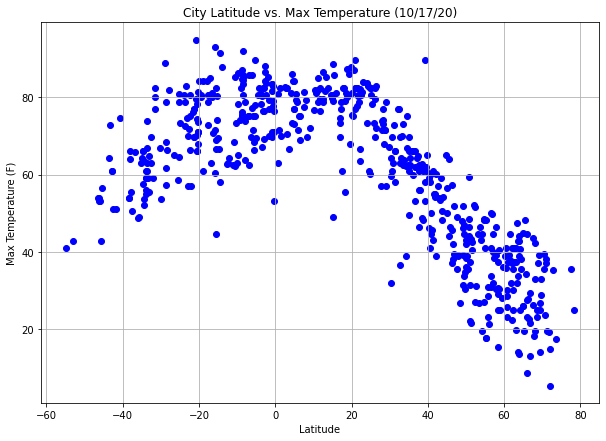

In [88]:
fig1, ax1 = plt.subplots(figsize=(10, 7))
ax1.scatter(city_clean_df['Lat'],city_clean_df['Max Temp'], marker='o', color='b')
ax1.grid(True)
ax1.set(xlabel='Latitude', ylabel='Max Temperature (F)', title='City Latitude vs. Max Temperature (10/17/20)');
plt.savefig("../output_data/CityLatvsMaxTemp.png")

The code is scatter plotting the city values for latitude vs max temp. As expected the temperatures decrease as the distance from the equator (0) increases.

## Latitude vs. Humidity Plot

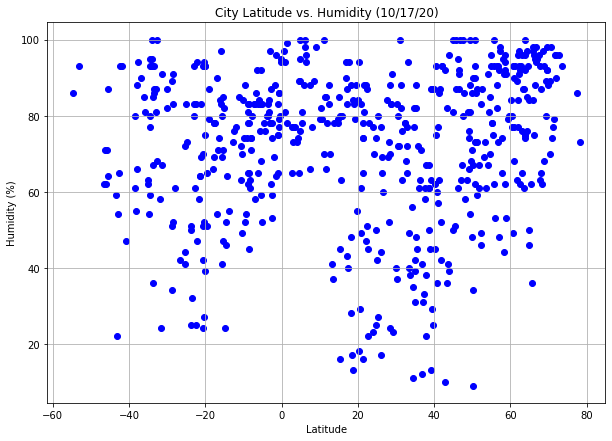

In [89]:
fig2, ax2 = plt.subplots(figsize=(10, 7))
ax2.scatter(city_clean_df['Lat'],city_clean_df['Humidity'], marker='o', color='b')
ax2.grid(True)
ax2.set(xlabel='Latitude', ylabel='Humidity (%)', title='City Latitude vs. Humidity (10/17/20)');
plt.savefig("../output_data/CityLatvsHum.png")

The code is scatter plotting the city values for latitude vs humidity. There is no dicernable pattern.

## Latitude vs. Cloudiness Plot

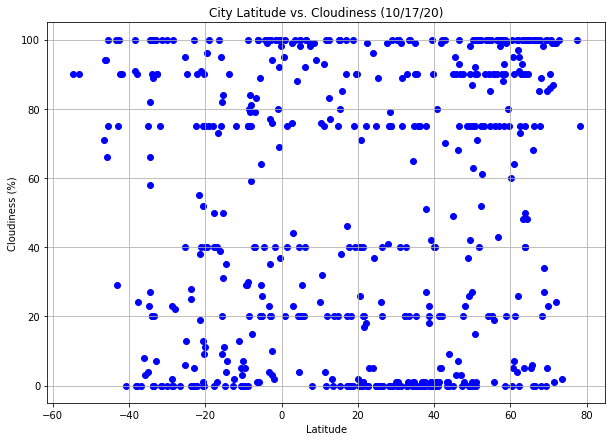

In [90]:
fig3, ax3 = plt.subplots(figsize=(10, 7))
ax3.scatter(city_clean_df['Lat'],city_clean_df['Cloudiness'], marker='o', color='b')
ax3.grid(True)
ax3.set(xlabel='Latitude', ylabel='Cloudiness (%)', title='City Latitude vs. Cloudiness (10/17/20)');
plt.savefig("../output_data/CityLatvsCloud.png")

The code is scatter plotting the city values for latitude vs cloudiness. There is no dicernable pattern but there is an odd clustering of certain cloudiness values.

## Latitude vs. Wind Speed Plot

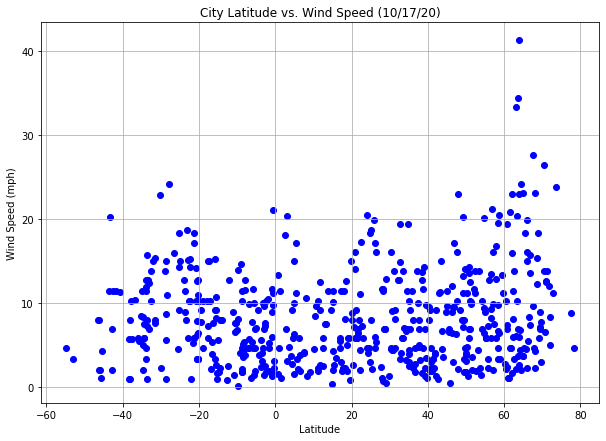

In [91]:
fig4, ax4 = plt.subplots(figsize=(10, 7))
ax4.scatter(city_clean_df['Lat'],city_clean_df['Wind Speed'], marker='o', color='b')
ax4.grid(True)
ax4.set(xlabel='Latitude', ylabel='Wind Speed (mph)', title='City Latitude vs. Wind Speed (10/17/20)');
plt.savefig("../output_data/CityLatvsWindSpd.png")

The code is scatter plotting the city values for latitude vs wind speed. There is no dicernable pattern but most of the cities have a wind speed from 0-10 mph although there are a few large speeds above 30 mph.

## Linear Regression

In [92]:
# Create dataframe for Northern and Southern Hemisphere cities
city_norhem_df = city_clean_df.loc[(city_clean_df['Lat'] >= 0), :]
city_souhem_df = city_clean_df.loc[(city_clean_df['Lat'] <= 0), :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-value or the correlation coefficient = -0.883259651024117


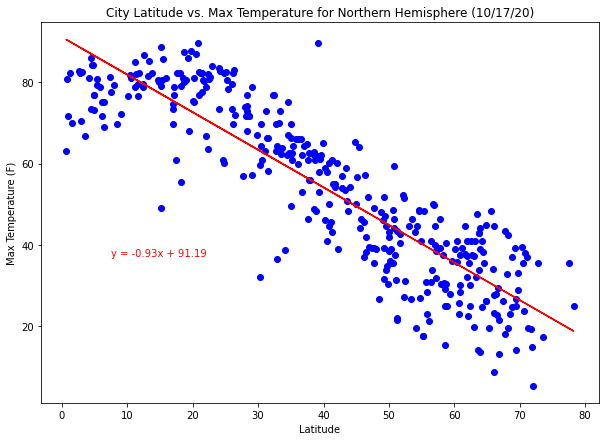

In [97]:
# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(city_norhem_df['Lat'], city_norhem_df['Max Temp'])
regression_values = city_norhem_df['Lat'] * slope + intercept

# Make a variable for the line equation
line_eq5 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print the r-value
print(f'r-value or the correlation coefficient = {rvalue}')

# Plot the data and linear regression
fig5, ax5 = plt.subplots(figsize=(10, 7))
ax5.scatter(city_norhem_df['Lat'],city_norhem_df['Max Temp'], marker='o', color='b')
ax5.plot(city_norhem_df['Lat'], regression_values, "r-")
ax5.set(xlabel='Latitude', ylabel='Max Temperature (F)', title='City Latitude vs. Max Temperature for Northern Hemisphere (10/17/20)');
ax5.annotate(line_eq5, xy=(22, 37), xycoords='data',xytext=(0.8, 0.95), textcoords='offset points', horizontalalignment='right', color="red");

The code is scatter plotting the city values for latitude vs max temp in the Northern Hemisphere. As expected the temperatures have an inverse relationship with latitude which the r-value supports.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-value or the correlation coefficient = 0.6117958078711244


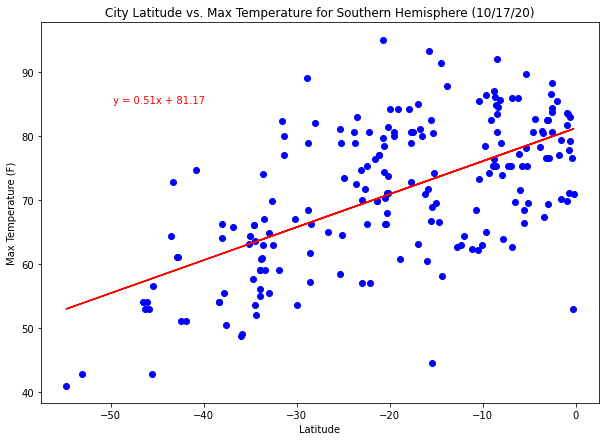

In [100]:
# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(city_souhem_df['Lat'], city_souhem_df['Max Temp'])
regression_values = city_souhem_df['Lat'] * slope + intercept

# Make a variable for the line equation
line_eq6 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print the r-value
print(f'r-value or the correlation coefficient = {rvalue}')

# Plot the data and linear regression
fig6, ax6 = plt.subplots(figsize=(10, 7))
ax6.scatter(city_souhem_df['Lat'],city_souhem_df['Max Temp'], marker='o', color='b')
ax6.plot(city_souhem_df['Lat'], regression_values, "r-")
ax6.set(xlabel='Latitude', ylabel='Max Temperature (F)', title='City Latitude vs. Max Temperature for Southern Hemisphere (10/17/20)');
ax6.annotate(line_eq6, xy=(-40, 85), xycoords='data',xytext=(0.8, 0.95), textcoords='offset points', horizontalalignment='right', color="red");

The code is scatter plotting the city values for latitude vs max temp in the Southern Hemisphere. As expected the temperatures have an inverse relationship with latitude which the r-value mostly supports.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-value or the correlation coefficient = 0.18155831781362447


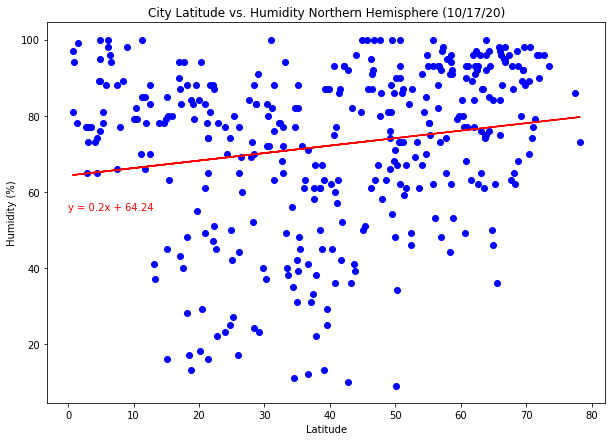

In [106]:
# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(city_norhem_df['Lat'], city_norhem_df['Humidity'])
regression_values = city_norhem_df['Lat'] * slope + intercept

# Make a variable for the line equation
line_eq7 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print the r-value
print(f'r-value or the correlation coefficient = {rvalue}')

# Plot the data and linear regression
fig7, ax7 = plt.subplots(figsize=(10, 7))
ax7.scatter(city_norhem_df['Lat'],city_norhem_df['Humidity'], marker='o', color='b')
ax7.plot(city_norhem_df['Lat'], regression_values, "r-")
ax7.set(xlabel='Latitude', ylabel='Humidity (%)', title='City Latitude vs. Humidity Northern Hemisphere (10/17/20)');
ax7.annotate(line_eq7, xy=(13, 55), xycoords='data',xytext=(0.8, 0.95), textcoords='offset points', horizontalalignment='right', color="red");

The code is scatter plotting the city values for latitude vs humidity in the Northern Hemisphere. The linear regression is basically meaningless with such a low r-value. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-value or the correlation coefficient = 0.06836576965323035


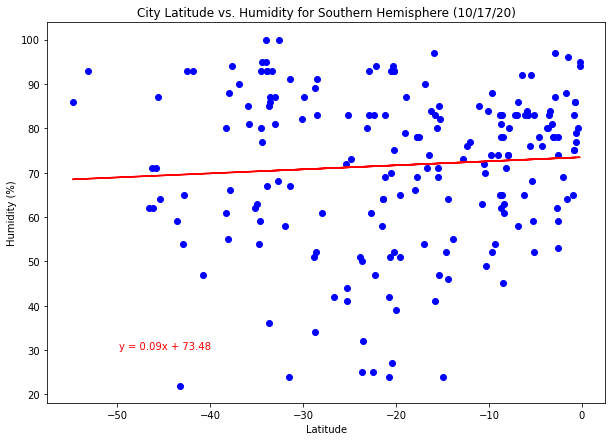

In [102]:
# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(city_souhem_df['Lat'], city_souhem_df['Humidity'])
regression_values = city_souhem_df['Lat'] * slope + intercept

# Make a variable for the line equation
line_eq8 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print the r-value
print(f'r-value or the correlation coefficient = {rvalue}')

# Plot the data and linear regression
fig8, ax8 = plt.subplots(figsize=(10, 7))
ax8.scatter(city_souhem_df['Lat'],city_souhem_df['Humidity'], marker='o', color='b')
ax8.plot(city_souhem_df['Lat'], regression_values, "r-")
ax8.set(xlabel='Latitude', ylabel='Humidity (%)', title='City Latitude vs. Humidity for Southern Hemisphere (10/17/20)');
ax8.annotate(line_eq8, xy=(-40, 30), xycoords='data',xytext=(0.8, 0.95), textcoords='offset points', horizontalalignment='right', color="red");

The code is scatter plotting the city values for latitude vs humidity in the Southern Hemisphere. The linear regression is basically meaningless with such a low r-value. It's even worse than the Northern Hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-value or the correlation coefficient = 0.19092239586187454


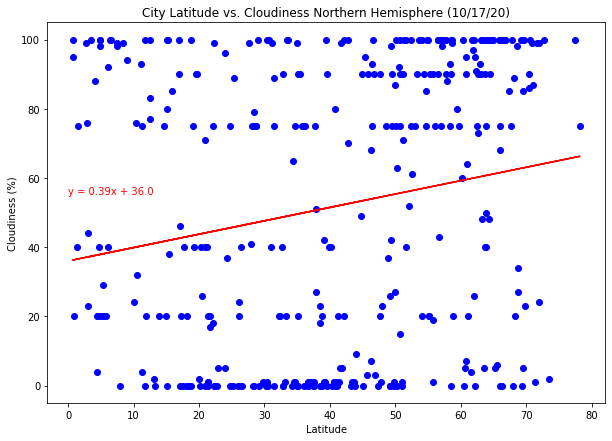

In [113]:
# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(city_norhem_df['Lat'], city_norhem_df['Cloudiness'])
regression_values = city_norhem_df['Lat'] * slope + intercept

# Make a variable for the line equation
line_eq9 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print the r-value
print(f'r-value or the correlation coefficient = {rvalue}')

# Plot the data and linear regression
fig9, ax9 = plt.subplots(figsize=(10, 7))
ax9.scatter(city_norhem_df['Lat'],city_norhem_df['Cloudiness'], marker='o', color='b')
ax9.plot(city_norhem_df['Lat'], regression_values, "r-")
ax9.set(xlabel='Latitude', ylabel='Cloudiness (%)', title='City Latitude vs. Cloudiness Northern Hemisphere (10/17/20)');
ax9.annotate(line_eq9, xy=(13, 55), xycoords='data',xytext=(0.8, 0.95), textcoords='offset points', horizontalalignment='right', color="red");

The code is scatter plotting the city values for latitude vs cloudiness in the Northern Hemisphere. The linear regression is basically meaningless with such a low r-value. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-value or the correlation coefficient = 0.0019291685504280562


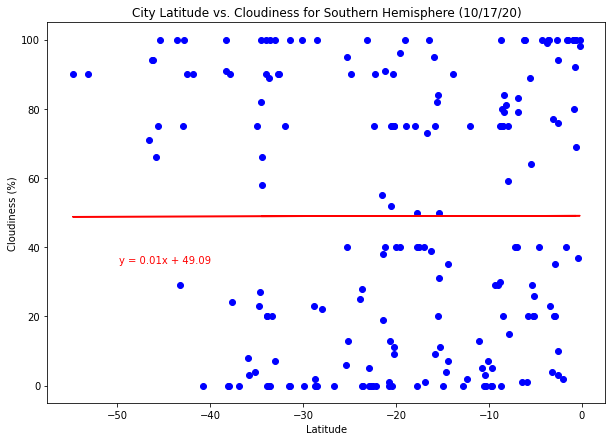

In [112]:
# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(city_souhem_df['Lat'], city_souhem_df['Cloudiness'])
regression_values = city_souhem_df['Lat'] * slope + intercept

# Make a variable for the line equation
line_eq10 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print the r-value
print(f'r-value or the correlation coefficient = {rvalue}')

# Plot the data and linear regression
fig10, ax10 = plt.subplots(figsize=(10, 7))
ax10.scatter(city_souhem_df['Lat'],city_souhem_df['Cloudiness'], marker='o', color='b')
ax10.plot(city_souhem_df['Lat'], regression_values, "r-")
ax10.set(xlabel='Latitude', ylabel='Cloudiness (%)', title='City Latitude vs. Cloudiness for Southern Hemisphere (10/17/20)');
ax10.annotate(line_eq10, xy=(-40, 35), xycoords='data',xytext=(0.8, 0.95), textcoords='offset points', horizontalalignment='right', color="red");

The code is scatter plotting the city values for latitude vs cloudiness in the Southern Hemisphere. The linear regression is basically meaningless with such a low r-value. It's almost zero.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-value or the correlation coefficient = 0.22145294163220414


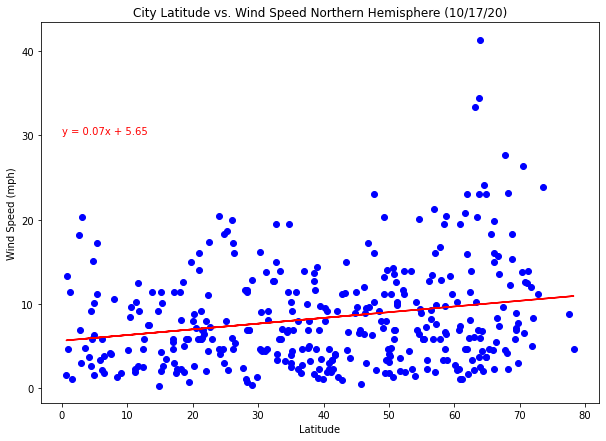

In [110]:
# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(city_norhem_df['Lat'], city_norhem_df['Wind Speed'])
regression_values = city_norhem_df['Lat'] * slope + intercept

# Make a variable for the line equation
line_eq11 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print the r-value
print(f'r-value or the correlation coefficient = {rvalue}')

# Plot the data and linear regression
fig11, ax11 = plt.subplots(figsize=(10, 7))
ax11.scatter(city_norhem_df['Lat'],city_norhem_df['Wind Speed'], marker='o', color='b')
ax11.plot(city_norhem_df['Lat'], regression_values, "r-")
ax11.set(xlabel='Latitude', ylabel='Wind Speed (mph)', title='City Latitude vs. Wind Speed Northern Hemisphere (10/17/20)');
ax11.annotate(line_eq11, xy=(13, 30), xycoords='data',xytext=(0.8, 0.95), textcoords='offset points', horizontalalignment='right', color="red");

The code is scatter plotting the city values for latitude vs wind speed in the Northern Hemisphere. The linear regression shows a slight relationship but with such a low r-value it is unlikely. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-value or the correlation coefficient = -0.1698283965498169


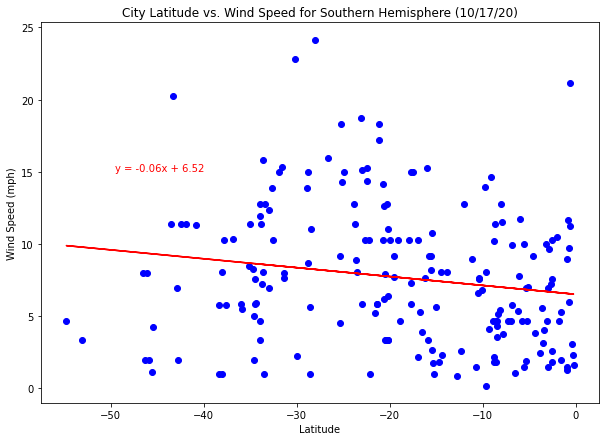

In [108]:
# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(city_souhem_df['Lat'], city_souhem_df['Wind Speed'])
regression_values = city_souhem_df['Lat'] * slope + intercept

# Make a variable for the line equation
line_eq12 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print the r-value
print(f'r-value or the correlation coefficient = {rvalue}')

# Plot the data and linear regression
fig12, ax12 = plt.subplots(figsize=(10, 7))
ax12.scatter(city_souhem_df['Lat'],city_souhem_df['Wind Speed'], marker='o', color='b')
ax12.plot(city_souhem_df['Lat'], regression_values, "r-")
ax12.set(xlabel='Latitude', ylabel='Wind Speed (mph)', title='City Latitude vs. Wind Speed for Southern Hemisphere (10/17/20)');
ax12.annotate(line_eq12, xy=(-40, 15), xycoords='data',xytext=(0.8, 0.95), textcoords='offset points', horizontalalignment='right', color="red");

The code is scatter plotting the city values for latitude vs wind speed in the Southern Hemisphere. The linear regression shows a slight relationship but with such a low r-value it is unlikely. 